<a href="https://colab.research.google.com/github/RethikNirmal/TorchLearn/blob/01_tutorial/01_workflow_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
from torch import nn

## Linear Regression with PyTorch

Regression equation is of the form `y = ax + b` where
- `x` : Input vector
- `a` : Weights
- `b` : bias


To start off, I will not focus on creating a separate train - validation - test set. I will be starting off with some dummy data, to mimic `y = 2x + 1`. Let's see how that pans out

In [11]:
class LinearRegression(torch.nn.Module):
  def __init__(self, input_dim):
    super(LinearRegression, self).__init__()
    self.linear_layer = torch.nn.Parameter( torch.randn(1, dtype= torch.float), requires_grad = True)
    self.bias = torch.nn.Parameter(torch.randn(1,dtype=torch.float),
                                   requires_grad = True)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer * x + self.bias

In [12]:
# Checking out the parameters in the model

model_0 = LinearRegression(10)
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6680], requires_grad=True),
 Parameter containing:
 tensor([-0.3548], requires_grad=True)]

In [13]:
# Considering we are trying to mimix y = 2x


x_train = torch.tensor([1,2,3,4,5,6,7,8,9], dtype = torch.float)
y_train = torch.tensor([2,4,6,8,10,12,14,16,18], dtype = torch.float)

print(x_train.shape, y_train.shape)
print(x_train.ndim ,y_train.ndim)


torch.Size([9]) torch.Size([9])
1 1


In [14]:
l1_loss = torch.nn.MSELoss()
optimiser = torch.optim.SGD(model_0.parameters(), lr = 0.01)

In [15]:
# Time to define some configs
N_EPOCH = 100

for epoch in range(N_EPOCH):
  model_0.train()
  y_pred= model_0(x_train)
  loss = l1_loss(y_pred, y_train)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()
  print(f"Epoch: {epoch} | Training Loss: {loss}")

Epoch: 0 | Training Loss: 235.01004028320312
Epoch: 1 | Training Loss: 28.917049407958984
Epoch: 2 | Training Loss: 3.558852195739746
Epoch: 3 | Training Loss: 0.4387109577655792
Epoch: 4 | Training Loss: 0.05479419603943825
Epoch: 5 | Training Loss: 0.007549444679170847
Epoch: 6 | Training Loss: 0.0017298063030466437
Epoch: 7 | Training Loss: 0.0010071684373542666
Epoch: 8 | Training Loss: 0.0009117403533309698
Epoch: 9 | Training Loss: 0.0008935497025959194
Epoch: 10 | Training Loss: 0.0008849033620208502
Epoch: 11 | Training Loss: 0.0008774885209277272
Epoch: 12 | Training Loss: 0.0008702694904059172
Epoch: 13 | Training Loss: 0.0008631417294964194
Epoch: 14 | Training Loss: 0.0008560577407479286
Epoch: 15 | Training Loss: 0.0008490451727993786
Epoch: 16 | Training Loss: 0.0008420734666287899
Epoch: 17 | Training Loss: 0.0008351737633347511
Epoch: 18 | Training Loss: 0.0008283284259960055
Epoch: 19 | Training Loss: 0.0008215385605581105
Epoch: 20 | Training Loss: 0.00081480597145855

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.9929], requires_grad=True),
 Parameter containing:
 tensor([0.0448], requires_grad=True)]

## Exercise



### Step 1
1. For training data, create a straight line dataset using the linear regression formula (weight * X + bias)
  - Set weight = 0.3 and bias = 0.9, There should be a minimum of 100 datapoints total
  - Split data into 80% training and 20% test
  - Plot the training and test data for visual clarity

In [17]:
# Creating a random X with 150 examples
torch.manual_seed(70)
x = torch.randn(150)
y = 0.3 * x + 0.9

In [18]:
# We will use torch Dataset to load the data into train and test set
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

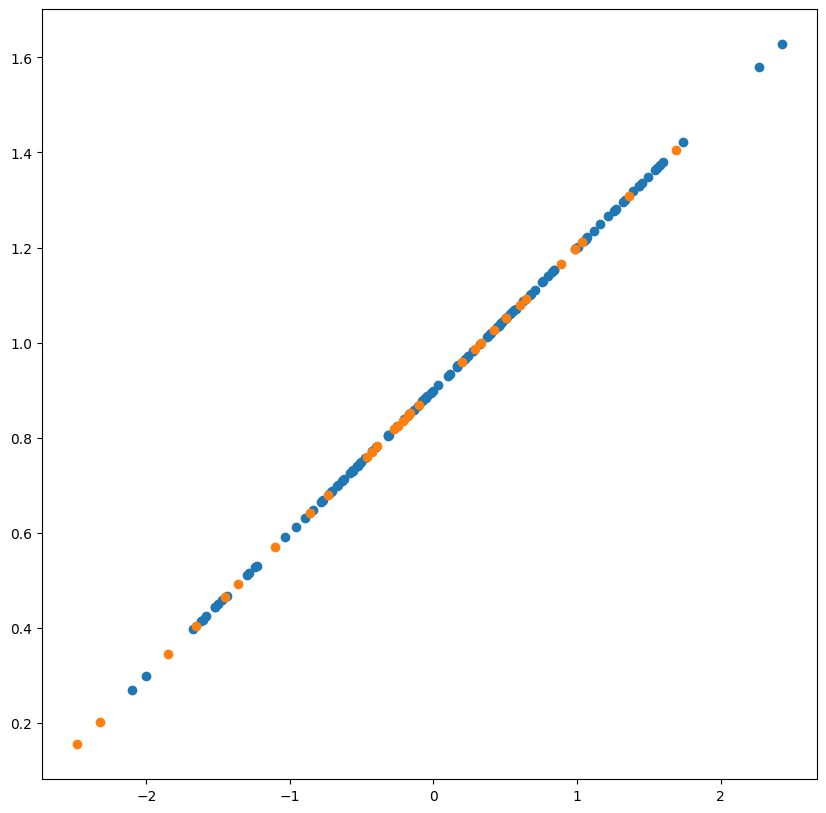

In [22]:
import matplotlib.pyplot as plt

plt.figure( figsize = (10,10))
plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_test, y_test, label = "Test Data")

### Step 2
2. Build a PyTorch model by subclassing `nn.Module`.
 - Inside should be a randomly initialised `nn.Parameter()` with `requires_grad = True`, one for weights and one for bias
 - Implement the forward method to compute the linear regression function you used to create dataset in 1.
 - Check it's `state_dict()`

Note: You are free to use `nn.Linear()` also if needed.

In [28]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

  def forward(self, x):
    return self.weights * x + self.bias

In [29]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([-0.3548])), ('bias', tensor([0.4271]))])

### Step 3

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
 - Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
 - Write a training loop to perform the appropriate training steps for 300 epochs.
 - The training loop should test the model on the test dataset every 20 epochs.

In [31]:
loss_func = nn.L1Loss()
optim = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [32]:
N_EPOCH = 300
training_loss = []
validation_loss = []
for epoch in range(N_EPOCH):
  model.train()
  y_pred = model(x_train)
  loss = loss_func(y_pred, y_train)
  optim.zero_grad()
  loss.backward()
  optim.step()

  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      test_pred = model(x_test)
      test_loss = loss_func(test_pred, y_test)
      print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")
      validation_loss.append(test_loss)

  training_loss.append(loss)

Epoch: 0 | Training Loss: 0.6828806400299072 | Test Loss: 0.6256995797157288
Epoch: 20 | Training Loss: 0.537139356136322 | Test Loss: 0.49506551027297974
Epoch: 40 | Training Loss: 0.39452606439590454 | Test Loss: 0.36388662457466125
Epoch: 60 | Training Loss: 0.2537064552307129 | Test Loss: 0.23255802690982819
Epoch: 80 | Training Loss: 0.11460402607917786 | Test Loss: 0.10148272663354874
Epoch: 100 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 120 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 140 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 160 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 180 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 200 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 220 | Training Loss: 0.005673128180205822 | Test Loss: 0.003966956399381161
Epoch: 240 | Training Los

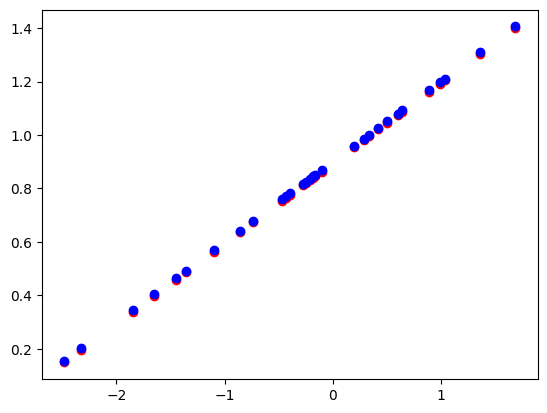

In [35]:
# Make predictions with the model
model.eval()

with torch.inference_mode():
  y_preds = model(x_test)
y_preds


plt.scatter(x_test, y_preds, color = 'r')
plt.scatter(x_test, y_test, color = 'b')